In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from numpy.polynomial.polynomial import polyfit, polyval
import calendar

Impor Dataframe

In [ ]:
df = pd.read_csv("../SENER_05.csv")
print(df.head())

Limpiar Data Frame

In [ ]:
#Eliminar las 5 primeras filas he imprimirla
df = df.drop(range(5), axis=0)
print(df.head())

Crear nueva Data Frame solo con la fila con indice 0 y 3 y transponerla para trabajarla en columnas

In [ ]:
new_df = df.iloc[[0, 3]].transpose()

print(new_df)

Guardar la nueva Data Frame

In [ ]:
new_df.to_csv('datos.csv', index=False)

Importar la nueva DataFrame limpio 

In [116]:
data = pd.read_csv("./datos.csv")
dataF = data.iloc[:, :2]
print(dataF)

      Fecha      Valores
0    ene-05  3313968.000
1    feb-05  3172093.000
2    mar-05  2810328.000
3    abr-05  2947894.000
4    may-05  2956447.000
..      ...          ...
150  jul-17  6596338.656
151  ago-17  6955019.615
152  sep-17  6911422.704
153  oct-17  6274654.214
154  nov-17  6022827.003

[155 rows x 2 columns]


Creando un diccionario para cambiar el formato de la fecha

In [117]:
months = {"ene" :1, "feb" : 2, "mar" : 3, "abr" :4, "may": 5, "jun": 6, "jul": 7, "ago": 8, "sep": 9, "oct": 10, "nov": 11, "dic": 12}

# Haciendo la converción de la abreviatura
dataF["Fecha"] = dataF["Fecha"].apply(lambda x: pd.to_datetime(str(months[x.split("-")[0].lower()]) + "-" + x.split("-")[1], format="%m-%y"))



In [118]:
print(dataF)

         Fecha      Valores
0   2005-01-01  3313968.000
1   2005-02-01  3172093.000
2   2005-03-01  2810328.000
3   2005-04-01  2947894.000
4   2005-05-01  2956447.000
..         ...          ...
150 2017-07-01  6596338.656
151 2017-08-01  6955019.615
152 2017-09-01  6911422.704
153 2017-10-01  6274654.214
154 2017-11-01  6022827.003

[155 rows x 2 columns]


Extrayendo los años de la columna Fecha

In [119]:
dataF["Year"] = pd.DatetimeIndex(dataF["Fecha"]).year

Máximos y Mínimos por año

In [120]:
# Máximo
maxYear = dataF.groupby("Year")["Valores"].max()

#Mínimo
minYear = dataF.groupby("Year")["Valores"].min()

#Media
meanYear = dataF.groupby("Year")["Valores"].mean()


Gráficando Máximos, Mínimos y Media por año

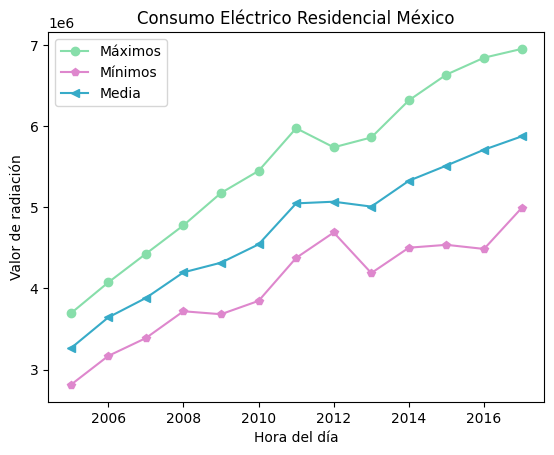

In [121]:
# Figura con un solo eje
fig, ax = plt.subplots()

# Máximos en rojo con círculos
ax.plot(maxYear.index, maxYear.values, color = '#87deaaff', marker = "o",  label='Máximos')

# Mínimos en verde con cuadrados
ax.plot(minYear.index, minYear.values, color = '#de87cdff', marker = "p", label='Mínimos')

# Media en azul con triángulos
ax.plot(meanYear.index, meanYear.values,  color = '#37abc8ff', marker = "<", label='Media')

# Etiquetas al eje X y al eje Y
ax.set_xlabel('Hora del día')
ax.set_ylabel('Valor de radiación')

# Titulo
ax.set_title('Consumo Eléctrico Residencial México')

# Leyenda
ax.legend()

# Mostrar la gráfica
plt.show()

Intervalo de Confianza

In [122]:
varianza = dataF.groupby(dataF['Year'])['Valores'].var()

n = dataF.groupby(dataF)['value'].count()
std = np.sqrt(varianza)
t = stats.t.ppf(1-0.05/2, n-1)
ci_upper = dataF.groupby(dataF["Year"])['Valores'].mean() + t*std/np.sqrt(n)
ci_lower = dataF.groupby(dataF["Year"])['Valores'].mean() - t*std/np.sqrt(n)

Graficando el Limite Superior e Inferiror del Intervalo de Confianza, junto con la media.

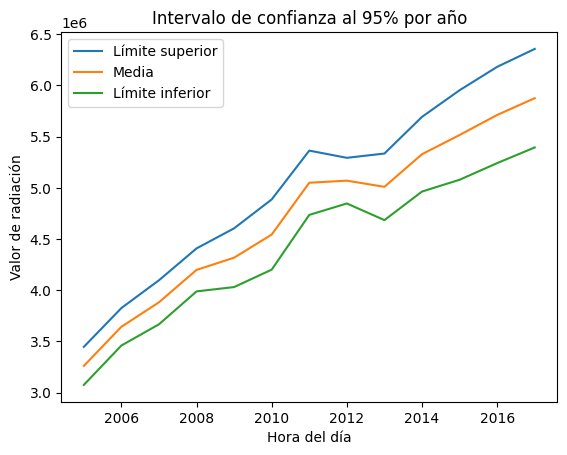

In [123]:
fig, ax = plt.subplots()

ax.plot(ci_upper.index, ci_upper, label='Límite superior')
ax.plot(meanYear.index, meanYear.values, label='Media')
ax.plot(ci_lower.index, ci_lower, label='Límite inferior')

ax.set_xlabel('Hora del día')
ax.set_ylabel('Valor de radiación')

ax.set_title('Intervalo de confianza al 95% por año')
ax.legend()

plt.show()

In [150]:
tabla = pd.DataFrame({'Año': maxYear.index, 'Maximos' : maxYear.values, 'Minimos' : minYear, 'Media': meanYear.values, 'Varianza' : varianza.values, 'Intervalo de confianza inferior': ci_upper, 'Intervalo de confianza superior': ci_lower})

# Mostrar tabla
print(tabla)

       Año      Maximos      Minimos         Media      Varianza  \
Year                                                               
2005  2005  3691852.000  2810328.000  3.261200e+06  8.553968e+10   
2006  2006  4074824.000  3167996.000  3.643275e+06  8.297900e+10   
2007  2007  4427601.000  3387969.000  3.882462e+06  1.145457e+11   
2008  2008  4778632.000  3718929.000  4.198762e+06  1.091800e+11   
2009  2009  5178251.023  3682543.599  4.318130e+06  2.039130e+11   
2010  2010  5450417.223  3847054.057  4.544145e+06  2.910639e+11   
2011  2011  5976857.448  4377315.616  5.049881e+06  2.441453e+11   
2012  2012  5741382.518  4690858.577  5.070408e+06  1.231198e+11   
2013  2013  5862884.580  4190200.243  5.010080e+06  2.618818e+11   
2014  2014  6320999.384  4503119.859  5.328645e+06  3.294892e+11   
2015  2015  6638581.268  4538341.883  5.516156e+06  4.734585e+11   
2016  2016  6846686.598  4487728.529  5.711804e+06  5.474704e+11   
2017  2017  6955019.615  4992222.241  5.875750e+

Calculando regresión polinomial de grado 6

In [163]:
# Obtener los coeficientes de la regresión polinomial
z = np.polyfit(tabla['Año'], tabla['Media'], 4)
p = np.poly1d(z)

# Calcular los valores de regresión para un rango de años
x_regresion = np.linspace(tabla['Año'].min(), tabla['Año'].max(), 100)
y_regresion = p(x_regresion)

Graficándo

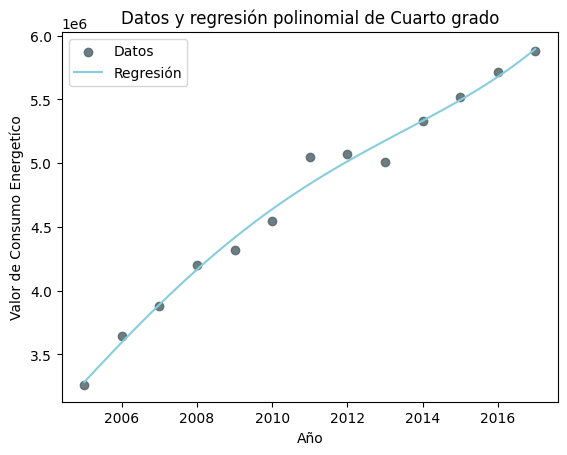

In [176]:
fig, ax = plt.subplots()
ax.scatter(tabla['Año'], tabla['Media'], label='Datos', color = "#53676cd9")
ax.plot(x_regresion, y_regresion, color = "#87cddeff", label='Regresión')
ax.set_xlabel('Año')
ax.set_ylabel('Valor de Consumo Energetíco')
ax.set_title('Datos y regresión polinomial de Cuarto grado')
ax.legend()

Predicción para los proximos 5 años

In [167]:
# Generar valores futuros para los próximos 5 años
x_prediccion = np.arange(tabla['Año'].max()+1, tabla['Año'].max()+6)

# Calcular las predicciones de valor promedio, pesimista y optimista
y_prediccion_promedio = p(x_prediccion)
y_prediccion_pesimista = p(x_prediccion) - 2*std.iloc[-1]
y_prediccion_optimista = p(x_prediccion) + 2*std.iloc[-1]

Graficando Predicciones

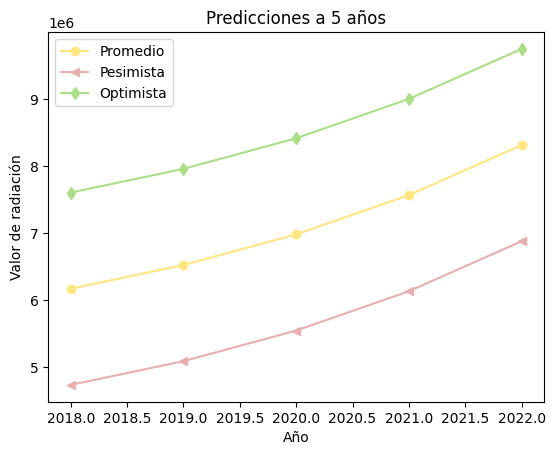

In [173]:
fig2, ax2 = plt.subplots()
ax2.plot(x_prediccion, y_prediccion_promedio, color = '#ffe680ff', marker = "o", label='Promedio')
ax2.plot(x_prediccion, y_prediccion_pesimista, color = '#e9afafff', marker = "<", label='Pesimista')
ax2.plot(x_prediccion, y_prediccion_optimista, color = '#aade87ff', marker = "d", label='Optimista')
ax2.set_xlabel('Año')
ax2.set_ylabel('Valor de radiación')
ax2.set_title('Predicciones a 5 años')
ax2.legend()

plt.show()